Okay we were able to clean it up for the most part but some further cleaning is needed to get the dataset ready for modeling.

### Loading Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

### Loading Datasets

In [14]:
df = pd.read_csv("updated_cleaned_dataset_2.csv")

In [15]:
list(df.columns.values)

['SEQN',
 'FastingGlucose',
 'FastingInsulin',
 'BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'EverDrank',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'HasDiabetes',
 'DIQ050',
 'DIQ070',
 'ACR',
 'likely_type1',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_2.0',
 'CurrentSmoker_3.0',
 'CurrentSmoker_Missing',
 'CurrentSmoker_Not at all',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR']

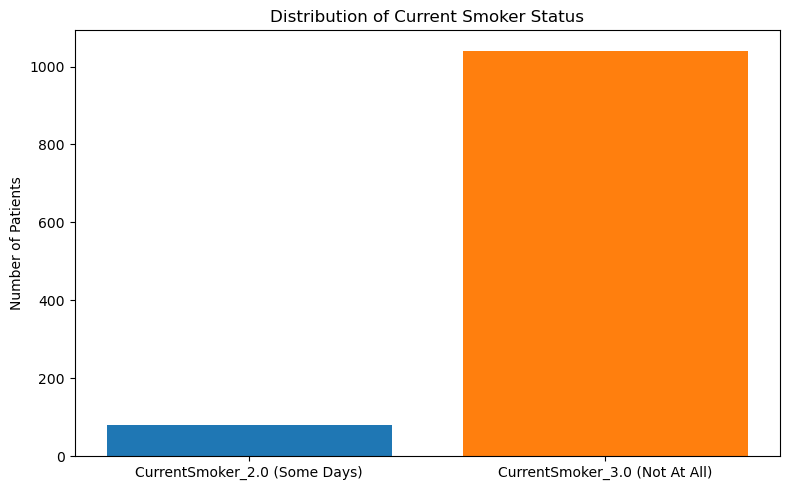

In [16]:
smoker_counts = {
    "CurrentSmoker_2.0 (Some Days)": df['CurrentSmoker_2.0'].sum(),
    "CurrentSmoker_3.0 (Not At All)": df['CurrentSmoker_3.0'].sum()
}

# Plot the bar graph
plt.figure(figsize=(8, 5))
plt.bar(smoker_counts.keys(), smoker_counts.values(), color=['#1f77b4', '#ff7f0e'])
plt.ylabel("Number of Patients")
plt.title("Distribution of Current Smoker Status")
plt.tight_layout()
plt.show()

In [17]:
def reconstruct_smoking_status(row):
    if row['CurrentSmoker_2.0'] == 1:
        return 'Some Days'
    elif row['CurrentSmoker_3.0'] == 1:
        return 'Not At All'
    else:
        return 'Every Day'

df['SmokingStatus'] = df.apply(reconstruct_smoking_status, axis=1)

In [18]:
df['Smoker'] = df['SmokingStatus'].apply(lambda x: 1 if x in ['Every Day', 'Some Days'] else 0)

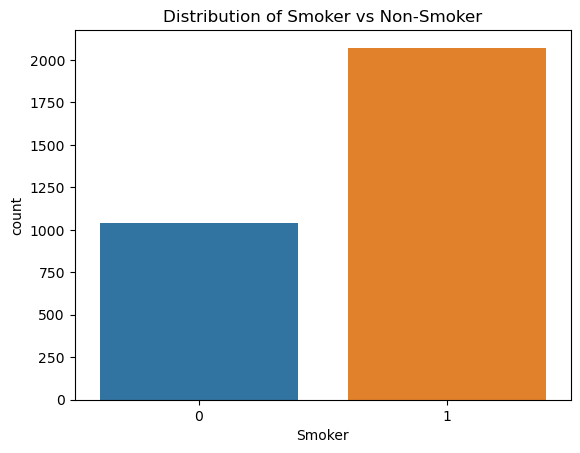

In [19]:
sns.countplot(data=df, x='Smoker')
plt.title("Distribution of Smoker vs Non-Smoker")
plt.show()

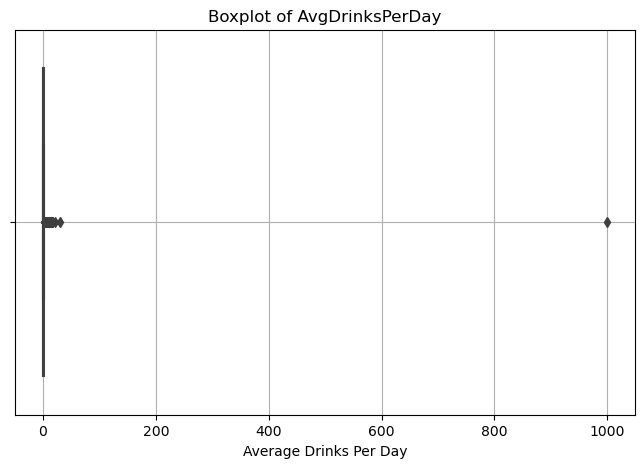

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AvgDrinksPerDay'])

plt.title('Boxplot of AvgDrinksPerDay')
plt.xlabel('Average Drinks Per Day')
plt.grid(True)
plt.show()

### Understanding Dataset

In [21]:
df.shape

(3113, 39)

In [22]:
list(df.columns.values)

['SEQN',
 'FastingGlucose',
 'FastingInsulin',
 'BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'EverDrank',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'HasDiabetes',
 'DIQ050',
 'DIQ070',
 'ACR',
 'likely_type1',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_2.0',
 'CurrentSmoker_3.0',
 'CurrentSmoker_Missing',
 'CurrentSmoker_Not at all',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR',
 'SmokingStatus',
 'Smoker']

In [23]:
columns_to_drop = [
    'CurrentSmoker_Missing',
    'EverDrank',  # redundant
    'DIQ050',     # insulin use (already accounted for in T2D filters)
    'DIQ070',     # diabetes pill use
    'FastingGlucose',    # HOMA-B multicolinearity
    'FastingInsulin',    # HOMA-B multicolinearity
    'SEQN',       #  no longer needed
    'likely_type1',
    'HasDiabetes', # t2d column already there
    'CurrentSmoker_2.0',
    'CurrentSmoker_3.0',
    'SmokingStatus'
]

# Drop columns
df = df.drop(columns=columns_to_drop)

In [24]:
df.shape

(3113, 27)

In [25]:
list(df.columns.values)

['BUN',
 'SerumCreatinine',
 'LBXSATSI',
 'EverSmoked100',
 'DrinkFrequency',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'ACR',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'CurrentSmoker_Not at all',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR',
 'Smoker']

#### Heatmap Of All Features

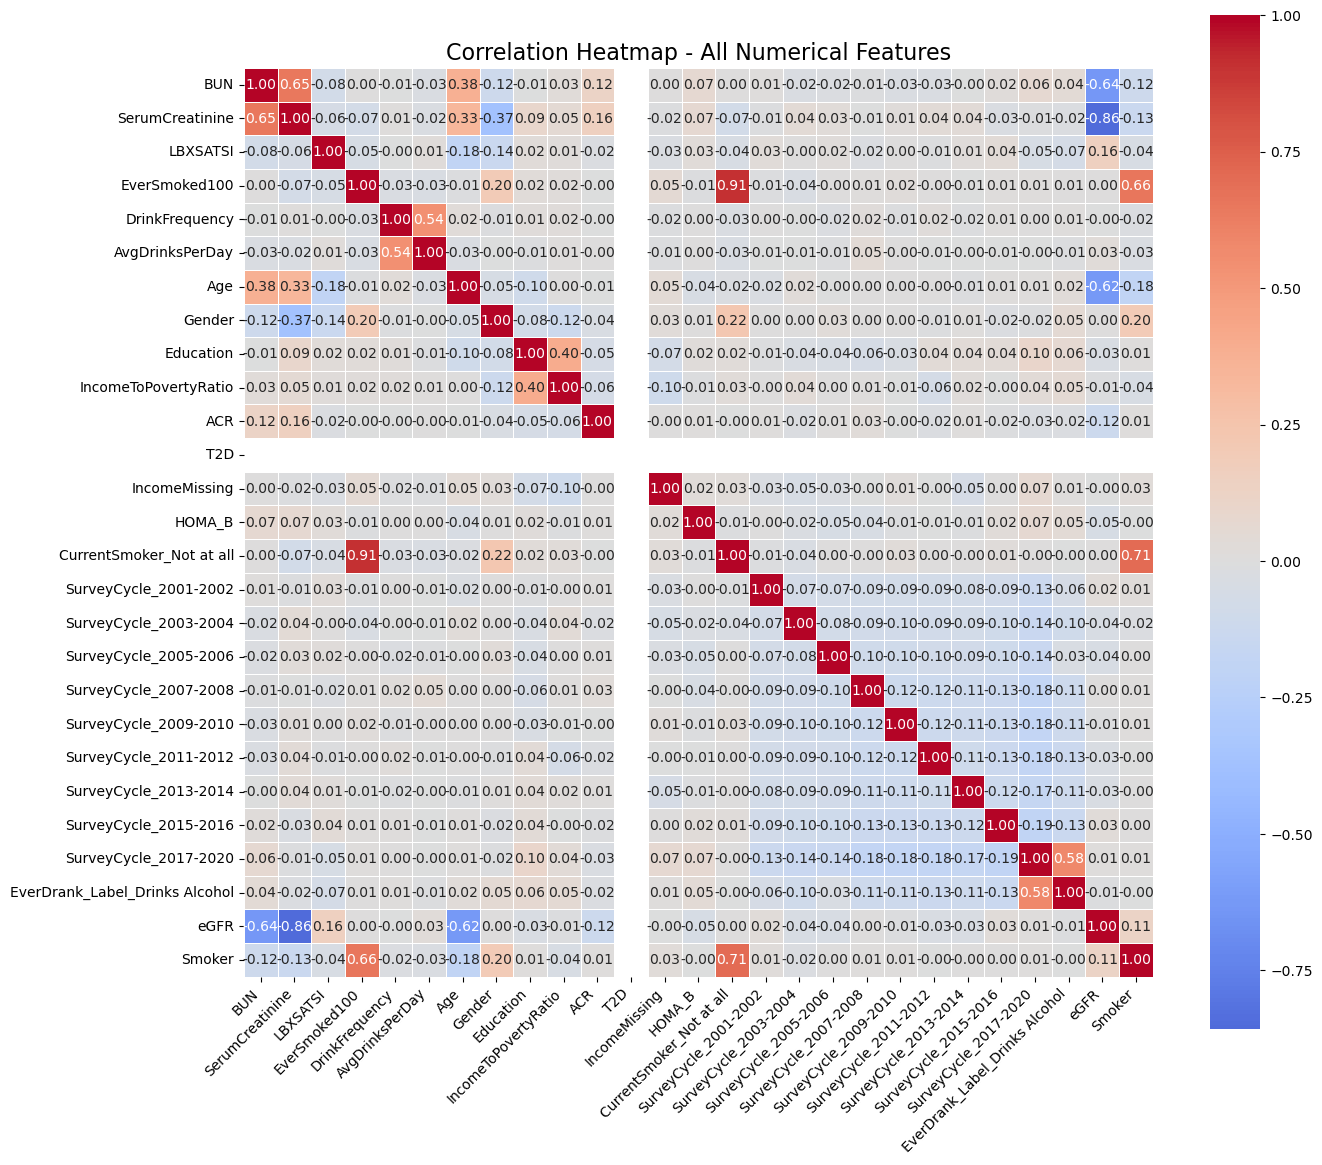

In [26]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)

# Add title
plt.title("Correlation Heatmap - All Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

#### Heatmap of Potential Modeling Features

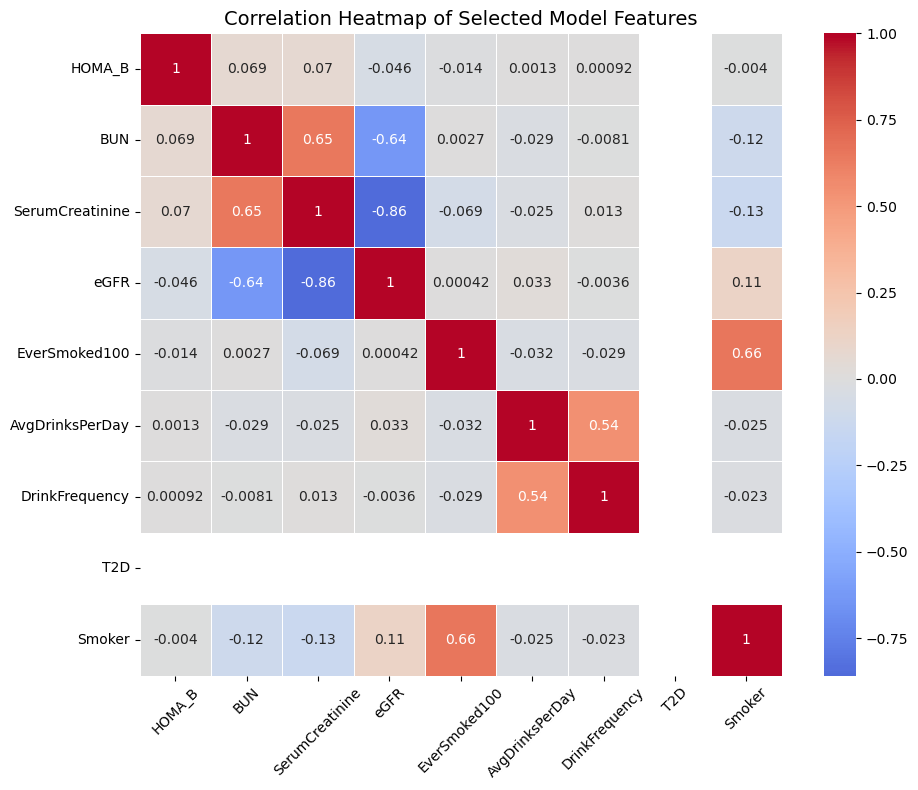

In [27]:
features_to_plot = [
    'HOMA_B',
    'BUN',
    'SerumCreatinine',
    'eGFR',
    'EverSmoked100',
    'AvgDrinksPerDay',
    'DrinkFrequency',
    'T2D',
    'Smoker'
]

corr_matrix = df[features_to_plot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Selected Model Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### If we are focusing on frequency rather than whether or not the patient smoked or drank ever

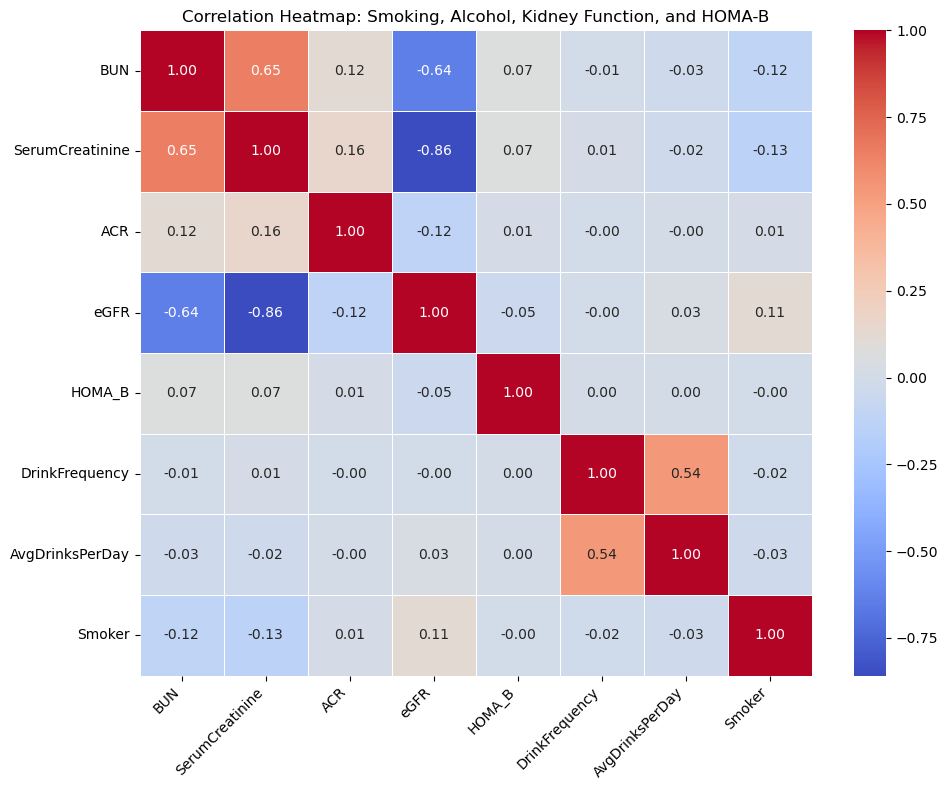

In [28]:
selected_features = [
    'BUN', 'SerumCreatinine', 'ACR', 'eGFR',       # Kidney function
    'HOMA_B',                                       # β-cell function
    'DrinkFrequency', 'AvgDrinksPerDay',           # Alcohol behavior
    'Smoker',                     
]

subset_df = df[selected_features]
corr_matrix = subset_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Smoking, Alcohol, Kidney Function, and HOMA-B")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
columns_to_drop_2 = [
    'SerumCreatinine',
    'CurrentSmoker_Not at all',
    'DrinkFrequency'
]

# Drop columns
df = df.drop(columns=columns_to_drop_2)

In [30]:
df.shape

(3113, 24)

In [31]:
list(df.columns.values)

['BUN',
 'LBXSATSI',
 'EverSmoked100',
 'AvgDrinksPerDay',
 'Age',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'ACR',
 'T2D',
 'IncomeMissing',
 'HOMA_B',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'eGFR',
 'Smoker']

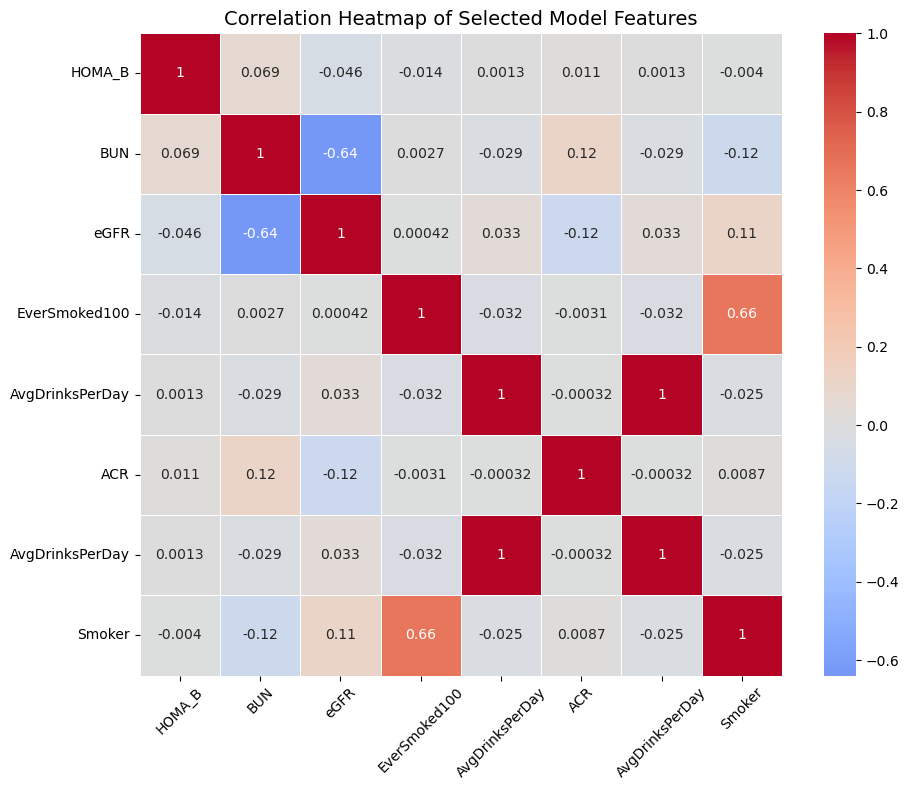

In [32]:
plot = [
    'HOMA_B',
    'BUN',
    'eGFR',
    'EverSmoked100',
    'AvgDrinksPerDay',
    'ACR',
    'AvgDrinksPerDay',
    'Smoker'
]

corr_matrix = df[plot].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Selected Model Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

I'm a little worried about the multicollinearity between eGFR and BUN (-0.64), so I'm gonna check the VIF.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['eGFR', 'BUN']]
X = add_constant(X)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

  Variable        VIF
0    const  55.873320
1     eGFR   1.692297
2      BUN   1.692297


Okay, great! So keeping both of these features won't pose a problem in the model.

In [34]:
df.describe()

,BUN,LBXSATSI,EverSmoked100,AvgDrinksPerDay,Age,Gender,Education,IncomeToPovertyRatio,ACR,T2D,...,SurveyCycle_2005-2006,SurveyCycle_2007-2008,SurveyCycle_2009-2010,SurveyCycle_2011-2012,SurveyCycle_2013-2014,SurveyCycle_2015-2016,SurveyCycle_2017-2020,EverDrank_Label_Drinks Alcohol,eGFR,Smoker
count,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.0,...,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000,3113.000000
mean,16.127530,25.003855,1.505300,1.431417,62.350145,1.487633,3.005782,2.214494,170.157019,1.0,...,0.072599,0.106650,0.108256,0.104722,0.093800,0.121105,0.210087,0.320270,85.408319,0.665596
std,6.625988,16.596779,0.543767,18.003245,12.726790,0.499927,1.373629,1.434493,780.208803,0.0,...,0.259518,0.308717,0.310753,0.306244,0.291597,0.326302,0.407435,0.466655,22.355734,0.471858
min,2.000000,3.000000,1.000000,0.000000,18.000000,1.000000,1.000000,0.000000,0.256410,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.236204,0.000000
25%,12.000000,16.000000,1.000000,0.000000,54.000000,1.000000,2.000000,1.100000,7.300000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.245444,0.000000
50%,15.000000,21.000000,1.000000,0.000000,63.000000,1.000000,3.000000,1.800000,14.657534,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,89.048235,1.000000
75%,19.000000,28.000000,2.000000,1.000000,72.000000,2.000000,4.000000,3.060000,47.919075,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.266927,1.000000
max,59.000000,280.000000,9.000000,999.000000,85.000000,2.000000,9.000000,5.000000,16636.363636,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150.251460,1.000000


In [35]:
min_max_df = df.agg(['min', 'max']).T
min_max_df.columns = ['Min', 'Max']
print(min_max_df)

                                      Min           Max
BUN                              2.000000     59.000000
LBXSATSI                         3.000000    280.000000
EverSmoked100                    1.000000      9.000000
AvgDrinksPerDay                  0.000000    999.000000
Age                             18.000000     85.000000
Gender                           1.000000      2.000000
Education                        1.000000      9.000000
IncomeToPovertyRatio             0.000000      5.000000
ACR                              0.256410  16636.363636
T2D                              1.000000      1.000000
IncomeMissing                    0.000000      1.000000
HOMA_B                           0.042781    104.016064
SurveyCycle_2001-2002            0.000000      1.000000
SurveyCycle_2003-2004            0.000000      1.000000
SurveyCycle_2005-2006            0.000000      1.000000
SurveyCycle_2007-2008            0.000000      1.000000
SurveyCycle_2009-2010            0.000000      1

In [36]:
df = df.drop(columns=['LBXSATSI'], errors='ignore')

In [37]:
df.shape

(3113, 23)

### Clean Up Time TTTTTTTT

#### Capping Extreme Values

In [38]:
### How is there even someone who drank 999 times in one day???
df['AvgDrinksPerDay'] = df['AvgDrinksPerDay'].clip(upper=20)

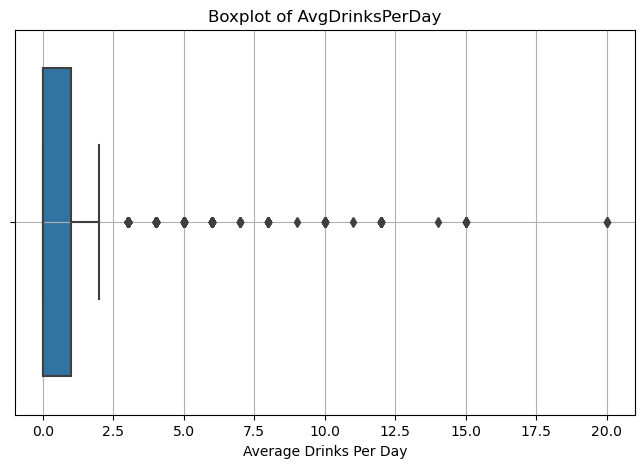

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['AvgDrinksPerDay'])

plt.title('Boxplot of AvgDrinksPerDay')
plt.xlabel('Average Drinks Per Day')
plt.grid(True)
plt.show()

#### Log Transform ACR

In [40]:
df['ACR_log'] = np.log1p(df['ACR'])
df = df.drop(columns=['ACR'])

#### Scaling the Rest

In [41]:
scaler = StandardScaler()

features_to_scale = ['BUN', 'Age', 'HOMA_B', 'eGFR']
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_to_scale]), 
                         columns=[f"{col}_scaled" for col in features_to_scale])

df = pd.concat([df, df_scaled], axis=1)

In [42]:
min_max_df = df.agg(['min', 'max']).T
min_max_df.columns = ['Min', 'Max']
print(min_max_df)

                                      Min         Max
BUN                              2.000000   59.000000
EverSmoked100                    1.000000    9.000000
AvgDrinksPerDay                  0.000000   20.000000
Age                             18.000000   85.000000
Gender                           1.000000    2.000000
Education                        1.000000    9.000000
IncomeToPovertyRatio             0.000000    5.000000
T2D                              1.000000    1.000000
IncomeMissing                    0.000000    1.000000
HOMA_B                           0.042781  104.016064
SurveyCycle_2001-2002            0.000000    1.000000
SurveyCycle_2003-2004            0.000000    1.000000
SurveyCycle_2005-2006            0.000000    1.000000
SurveyCycle_2007-2008            0.000000    1.000000
SurveyCycle_2009-2010            0.000000    1.000000
SurveyCycle_2011-2012            0.000000    1.000000
SurveyCycle_2013-2014            0.000000    1.000000
SurveyCycle_2015-2016       

In [43]:
columns_to_drop_3 = [
    'eGFR',
    'Age',
    'BUN',
    'HOMA_B'
]

# Drop columns
df = df.drop(columns=columns_to_drop_3)

In [44]:
df.shape

(3113, 23)

In [45]:
from sklearn.model_selection import train_test_split

# Define your features and target
X = df.drop(columns=['HOMA_B_scaled'])  # Or use your final list of modeling features
y = df['HOMA_B_scaled']  # Target variable: beta-cell function

# Split the data (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
df.to_csv('ready_to_model_3.csv', index=False)

In [47]:
import pandas as pd

In [48]:
data = pd.read_csv('ready_to_model_3.csv')

In [49]:
list(data.columns.values)

['EverSmoked100',
 'AvgDrinksPerDay',
 'Gender',
 'Education',
 'IncomeToPovertyRatio',
 'T2D',
 'IncomeMissing',
 'SurveyCycle_2001-2002',
 'SurveyCycle_2003-2004',
 'SurveyCycle_2005-2006',
 'SurveyCycle_2007-2008',
 'SurveyCycle_2009-2010',
 'SurveyCycle_2011-2012',
 'SurveyCycle_2013-2014',
 'SurveyCycle_2015-2016',
 'SurveyCycle_2017-2020',
 'EverDrank_Label_Drinks Alcohol',
 'Smoker',
 'ACR_log',
 'BUN_scaled',
 'Age_scaled',
 'HOMA_B_scaled',
 'eGFR_scaled']

In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("ready_to_model_3.csv") 


Random Forest MSE: 0.1469
Random Forest R²: 0.8531


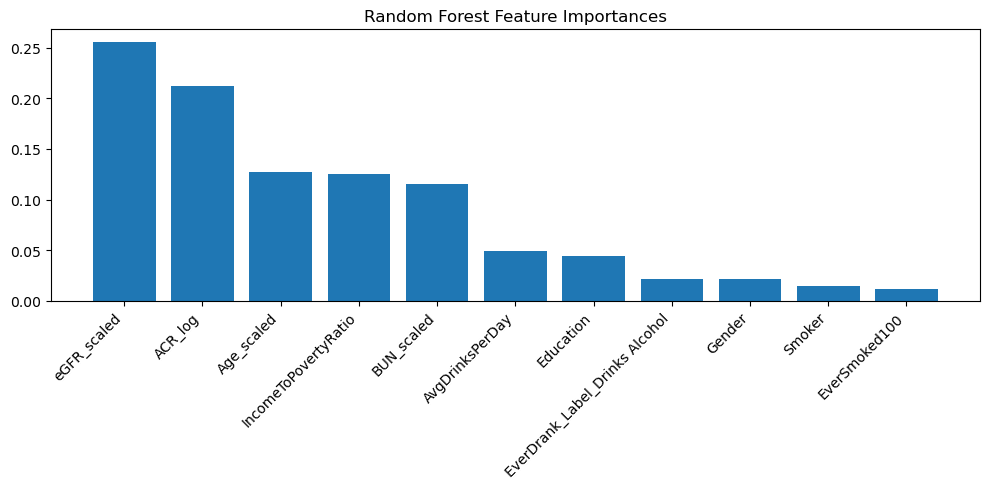

In [53]:
predictors = [
    "BUN_scaled", "EverSmoked100", "Smoker", "eGFR_scaled", "ACR_log",
    "EverDrank_Label_Drinks Alcohol", "AvgDrinksPerDay", "Gender",
    "Age_scaled", "Education", "IncomeToPovertyRatio"
]
outcome = "HOMA_B_scaled"

df_rf = df[predictors + [outcome]].dropna()

rf_model = RandomForestRegressor(n_estimators=500, random_state=123)
rf_model.fit(df_rf[predictors], df_rf[outcome])

predicted_rf = rf_model.predict(df_rf[predictors])

mse_rf = mean_squared_error(df_rf[outcome], predicted_rf)
r2_rf = r2_score(df_rf[outcome], predicted_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}")

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(predictors)), importances[indices], align="center")
plt.xticks(range(len(predictors)), [predictors[i] for i in indices], rotation=45, ha='right')
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

In [59]:
# Load the re-uploaded dataset
df = pd.read_csv('ready_to_model_3.csv')

# Define predictors and outcome
predictors = [
    "BUN_scaled", "EverSmoked100", "Smoker", "eGFR_scaled", "ACR_log",
    "EverDrank_Label_Drinks Alcohol", "AvgDrinksPerDay", "Gender",
    "Age_scaled", "Education", "IncomeToPovertyRatio"
]
outcome = "HOMA_B_scaled"

# Prepare modeling dataset
df_rf = df[predictors + [outcome]].dropna()

# Create data dictionary function
def create_data_dictionary(data):
    data_dict = {
        "Feature Name": [],
        "Data Type": [],
        "Missing Values": [],
        "Description": [],
    }

    feature_descriptions = {
        "BUN_scaled": "Standardized blood urea nitrogen level (marker of kidney function)",
        "EverSmoked100": "Ever smoked at least 100 cigarettes in life (1 = Yes, 2 = No)",
        "Smoker": "Current smoker flag (1 = Yes, 0 = No)",
        "eGFR_scaled": "Standardized estimated glomerular filtration rate (kidney function)",
        "ACR_log": "Log-transformed urine albumin-to-creatinine ratio (marker of kidney damage)",
        "EverDrank_Label_Drinks Alcohol": "Label indicating whether participant drinks alcohol",
        "AvgDrinksPerDay": "Average number of alcoholic drinks per day over past 12 months",
        "Gender": "Gender (1 = Male, 2 = Female)",
        "Age_scaled": "Standardized age of participant",
        "Education": "Education level (1 = Less than 9th grade to 5 = College graduate or above)",
        "IncomeToPovertyRatio": "Ratio of family income to poverty level",
        "HOMA_B_scaled": "Scaled Homeostatic Model Assessment of Beta-cell function (HOMA-B)"
    }

    for column in data.columns:
        data_dict["Feature Name"].append(column)
        data_dict["Data Type"].append(data[column].dtype)
        data_dict["Missing Values"].append(data[column].isnull().sum())
        data_dict["Description"].append(feature_descriptions.get(column, "No description available"))

    return pd.DataFrame(data_dict)

data_dict_df = create_data_dictionary(df_rf)
data_dict_df

,Feature Name,Data Type,Missing Values,Description
0,BUN_scaled,float64,0,Standardized blood urea nitrogen level (marker...
1,EverSmoked100,float64,0,Ever smoked at least 100 cigarettes in life (1...
2,Smoker,int64,0,"Current smoker flag (1 = Yes, 0 = No)"
3,eGFR_scaled,float64,0,Standardized estimated glomerular filtration r...
4,ACR_log,float64,0,Log-transformed urine albumin-to-creatinine ra...
5,EverDrank_Label_Drinks Alcohol,int64,0,Label indicating whether participant drinks al...
6,AvgDrinksPerDay,float64,0,Average number of alcoholic drinks per day ove...
7,Gender,float64,0,"Gender (1 = Male, 2 = Female)"
8,Age_scaled,float64,0,Standardized age of participant
9,Education,float64,0,Education level (1 = Less than 9th grade to 5 ...
